<a href="https://colab.research.google.com/github/AdrielsonDias/ProjetoFinalPython/blob/main/Projeto_Final_Adrielson_Dias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final**

## Breve descrição:
Esse projeto será sobre uma análise de vendas de uma loja em 3 cidades distintas, com foco em identificar padrões de vendas, otimizar o estoque e entender a correlação entre preço e quantidade.

Geração de dados aleatórios para a análise de vendas em algumas cidades

In [11]:
import random
import pandas as pd
import numpy as np

# Função para gerar dados aleatórios de vendas
def gerar_dados_vendas(n):
    cidades = ["Recife", "Jaboatão", "Cabo de Santo Agostinho"]
    linhas_produto = ["Eletrônicos", "Roupas", "Bebidas", "Móveis", "Livros", "Jogos"]
    pagamentos = ["Cartão de Crédito", "Cartão de Débito", "Dinheiro"]

    dados = {
        "City": [random.choice(cidades) for _ in range(n)],
        "Product line": [random.choice(linhas_produto) for _ in range(n)],
        "Payment": [random.choice(pagamentos) for _ in range(n)],
        "Unit price": [round(random.uniform(10.0, 500.0), 2) for _ in range(n)],
        "Quantity": [random.randint(1, 10) for _ in range(n)],
    }
    dados["Total"] = [round(dados["Unit price"][i] * dados["Quantity"][i], 2) for i in range(n)]
    return pd.DataFrame(dados)

# Geração inicial de 100 dados aleatórios
df = gerar_dados_vendas(100)

while True:
    # Fila das últimas 10 cidades
    fila_cidades = list(df["City"].tail(10))
    print("\nFila inicial das cidades (últimas 10 transações):")
    print(fila_cidades)

    # Adicionar uma nova venda aleatória
    nova_venda = gerar_dados_vendas(1)
    df = pd.concat([df, nova_venda], ignore_index=True)

    print("\nNova venda adicionada na cidade:", nova_venda["City"].iloc[0])

    # Atualizar a fila das últimas 10 cidades
    fila_cidades = list(df["City"].tail(10))
    print("\nFila das cidades após adicionar nova venda:")
    print(fila_cidades)

    # Estatísticas descritivas
    print("\nEstatísticas descritivas dos preços unitários e totais:")
    print(df[["Unit price", "Total"]].describe())

    # Vendas por cidade
    print("\nVendas por cidade:")
    print(df.groupby("City").size())

    # Vendas por linha de produto
    print("\nVendas por linha de produto:")
    print(df.groupby("Product line").size())

    # Vendas por método de pagamento
    print("\nVendas por método de pagamento:")
    print(df.groupby("Payment").size())

    # Total de vendas por método de pagamento
    print("\nTotal de vendas por método de pagamento:")
    print(df.groupby("Payment")["Total"].sum())

    # Matriz de totais (cidade x linha de produto)
    matriz_totais = df.pivot_table(values="Total", index="City", columns="Product line", aggfunc="sum", fill_value=0)
    print("\nMatriz de totais (cidade x linha de produto):")
    print(matriz_totais)

    # Totais gerais por cidade e linha de produto
    totais_cidade = np.dot(matriz_totais, np.ones(matriz_totais.shape[1]))
    totais_linha = np.dot(np.ones(matriz_totais.shape[0]), matriz_totais)

    print("\nTotal geral por cidade (usando álgebra linear com numpy):")
    for cidade, total in zip(matriz_totais.index, totais_cidade):
        print(f"{cidade}: {total:.2f}")

    print("\nTotal geral por linha de produto (usando álgebra linear com numpy):")
    for linha, total in zip(matriz_totais.columns, totais_linha):
        print(f"{linha}: {total:.2f}")

    # Perguntar ao usuário se deseja gerar mais dados
    opcao = input("\nDeseja gerar mais dados? (Digite um número para gerar ou 'n' para sair)\n>> ")
    if opcao.lower() == 'n':
        print("Encerrando o programa.")
        break
    else:
        try:
            qtd = int(opcao)
            novos_dados = gerar_dados_vendas(qtd)
            df = pd.concat([df, novos_dados], ignore_index=True)
            print(f"\n{qtd} novos dados gerados e adicionados ao DataFrame.")
        except ValueError:
            print("Entrada inválida. Por favor, insira um número ou 'n' para sair.")



Fila inicial das cidades (últimas 10 transações):
['Cabo de Santo Agostinho', 'Jaboatão', 'Recife', 'Recife', 'Jaboatão', 'Jaboatão', 'Cabo de Santo Agostinho', 'Recife', 'Recife', 'Cabo de Santo Agostinho']

Nova venda adicionada na cidade: Recife

Fila das cidades após adicionar nova venda:
['Jaboatão', 'Recife', 'Recife', 'Jaboatão', 'Jaboatão', 'Cabo de Santo Agostinho', 'Recife', 'Recife', 'Cabo de Santo Agostinho', 'Recife']

Estatísticas descritivas dos preços unitários e totais:
       Unit price        Total
count  101.000000   101.000000
mean   247.882178  1358.332277
std    142.427368  1073.944003
min     10.070000    24.720000
25%    125.830000   473.430000
50%    249.400000  1107.880000
75%    358.410000  2132.800000
max    493.630000  4477.000000

Vendas por cidade:
City
Cabo de Santo Agostinho    38
Jaboatão                   31
Recife                     32
dtype: int64

Vendas por linha de produto:
Product line
Bebidas        27
Eletrônicos    13
Jogos          14
Liv

**Análise Exploratória dos Dados**

In [12]:
# Estatísticas descritivas
print("Estatísticas descritivas:\n")
print(df.describe())

# Contagem por cidade e por linha de produto
print("\nVendas por cidade:\n")
print(df['City'].value_counts())

print("\nVendas por linha de produto:\n")
print(df['Product line'].value_counts())

# Verificar se existem valores ausentes
print("\nValores ausentes:\n")
print(df.isnull().sum())

Estatísticas descritivas:

       Unit price    Quantity        Total
count  202.000000  202.000000   202.000000
mean   252.762277    5.272277  1309.398218
std    140.537701    2.916777  1046.621613
min     10.070000    1.000000    18.280000
25%    129.672500    2.250000   441.812500
50%    264.065000    5.000000  1066.055000
75%    370.317500    8.000000  1933.192500
max    496.100000   10.000000  4492.400000

Vendas por cidade:

City
Recife                     71
Cabo de Santo Agostinho    69
Jaboatão                   62
Name: count, dtype: int64

Vendas por linha de produto:

Product line
Bebidas        43
Livros         35
Roupas         33
Eletrônicos    32
Móveis         31
Jogos          28
Name: count, dtype: int64

Valores ausentes:

City            0
Product line    0
Payment         0
Unit price      0
Quantity        0
Total           0
dtype: int64


**Visualização dos Dados**

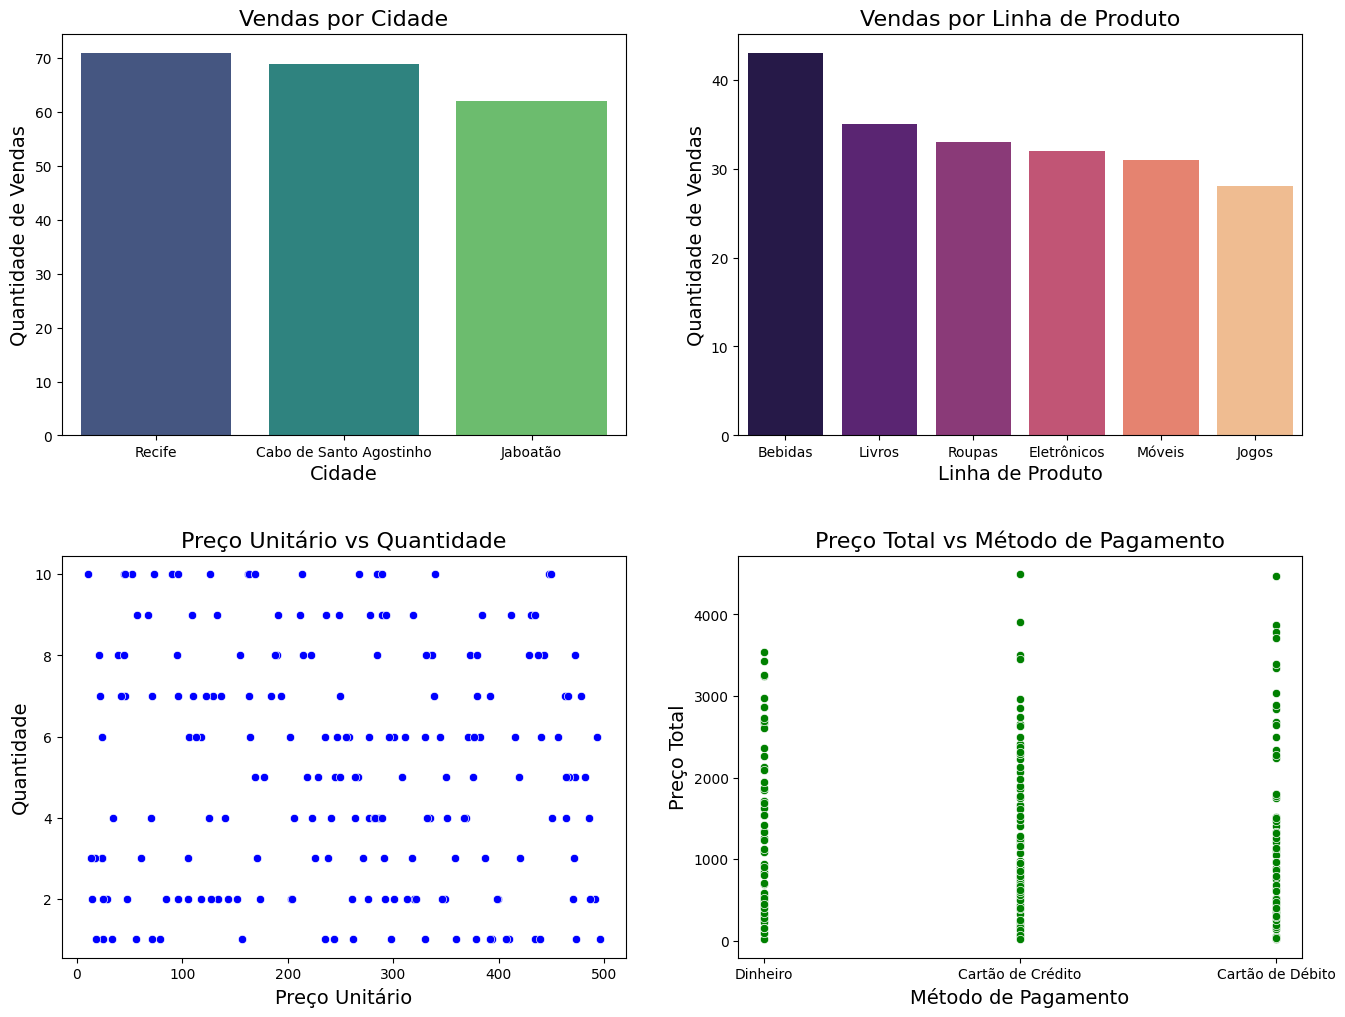

In [15]:
# Criando múltiplos subgráficos (1 linha, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Ajuste o tamanho da figura conforme necessário

# Recalcular as agregações necessárias
vendas_por_cidade = df['City'].value_counts()
vendas_por_produto = df['Product line'].value_counts()


# Gráfico de Vendas por Cidade
sns.barplot(x=vendas_por_cidade.index, y=vendas_por_cidade.values, palette="viridis", hue=vendas_por_cidade.index, ax=axes[0, 0])
axes[0, 0].set_title("Vendas por Cidade", fontsize=16)
axes[0, 0].set_xlabel("Cidade", fontsize=14)
axes[0, 0].set_ylabel("Quantidade de Vendas", fontsize=14)

# Gráfico de Vendas por Linha de Produto
sns.barplot(x=vendas_por_produto.index, y=vendas_por_produto.values, palette="magma", hue=vendas_por_produto.index, ax=axes[0, 1])
axes[0, 1].set_title("Vendas por Linha de Produto", fontsize=16)
axes[0, 1].set_xlabel("Linha de Produto", fontsize=14)
axes[0, 1].set_ylabel("Quantidade de Vendas", fontsize=14)

# Gráfico de Preço Unitário vs Quantidade
sns.scatterplot(x=df['Unit price'], y=df['Quantity'], color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Preço Unitário vs Quantidade", fontsize=16)
axes[1, 0].set_xlabel("Preço Unitário", fontsize=14)
axes[1, 0].set_ylabel("Quantidade", fontsize=14)

# Gráfico de Preço Total vs Método de Pagamento
sns.scatterplot(x=df['Payment'], y=df['Total'], color='green', ax=axes[1, 1])
axes[1, 1].set_title("Preço Total vs Método de Pagamento", fontsize=16)
axes[1, 1].set_xlabel("Método de Pagamento", fontsize=14)
axes[1, 1].set_ylabel("Preço Total", fontsize=14)

# Ajustando o layout para dar um bom espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Aumentando o espaçamento
plt.show()
